In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# load the famous iris data
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
type(iris.data)

numpy.ndarray

In [9]:
# what do you think these attributes represent?
iris.data[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# intro to numpy
type(iris.data)

numpy.ndarray

In [12]:
## PART 1: Read data into pandas and explore
pd.DataFrame(iris.data).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# read the iris data into pandas, with our refined column names
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
species = [iris.target_names[i] for i in iris.target]

In [16]:
# add the species list as a new DataFrame column
df['species'] = species
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.groupby('species').sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [22]:
df.groupby('species')['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [23]:
'''
agg is a new function we haven't seen yet. It will
aggregate each column using specified lists of functions.
We have been using some of its shortcuts but using
agg allows us to put in many functions at a time

df.groupby('species').agg(np.mean)
==
df.groupby('species').mean()

BUT 
df.groupby('species').agg([np.min, np.max])

doesn't have a short form
'''

df.groupby('species').agg([np.min, np.max])


sepal_length      sepal_width      petal_length      petal_width  \
                   amin amax        amin amax         amin amax        amin   
species                                                                       
setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                 
           amax  
species          
setosa      0.6  
versicolor  1.8  
virginica   2.5

In [18]:
color_map = {
    'versicolor': 'r',
    'setosa': 'b',
    'virginica': 'g'
}
colors = [color_map[s] for s in df['species']]
pd.scatter_matrix(df, color=colors, figsize=(10,10))

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

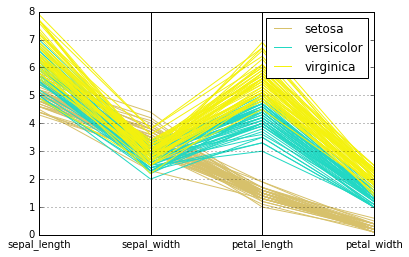

In [25]:
# parallel coordinates help us visualize multivariate data

from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, 'species')